In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
import yfinance as yf
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [2]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt


In [3]:
import json
import os
import pymongo
from pymongo import MongoClient

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.datasets import make_blobs
import pandas as pd
import tensorflow as tf
import matplotlib as plt 

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [12]:
Soybeans=yf.Ticker("ZS=F")
Corn=yf.Ticker("ZC=F")
Wheat=yf.Ticker("ZW=F")
Cotton=yf.Ticker("CT=F")
Crude=yf.Ticker("CL=F")
USDBRL=yf.Ticker("BRL=X")
EURUSD=yf.Ticker("EURUSD=X")
IR=yf.Ticker("^TNX")

In [35]:
Soybeans_H=Soybeans.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Soybeans_H["Range"]=Soybeans_H["High"]-Soybeans_H["Low"]
Soybeans_H=Soybeans_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Soybeans_H['log_rtn'] = np.log(Soybeans_H['Close']).diff()

# Var Swap (returns are not demeaned)
Soybeans_H['real_var'] = np.square(Soybeans_H['log_rtn']).rolling(window).sum() * ann_factor
Soybeans_H['Vol'] = np.sqrt(Soybeans_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Soybeans_P=Soybeans_H[:len(Soybeans_H)-90]
Soybeans_P=Soybeans_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Soybeans_H=Soybeans_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Soybeans_H

,Close,Range,Vol
Date,,,
2021-03-16,1418.75,12.25,0.208140
2021-03-12,1415.75,29.25,0.208293
2021-03-11,1415.50,14.00,0.211932
2021-03-10,1411.50,30.25,0.212049
2021-03-09,1441.25,13.50,0.209248
...,...,...,...
2001-01-31,459.75,1.25,0.169929
2001-01-30,461.25,1.50,0.170212
2001-01-29,459.75,2.25,0.170160


In [36]:
Corn_H=Corn.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Corn_H["Range"]=Corn_H["High"]-Corn_H["Low"]
Corn_H=Corn_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Corn_H['log_rtn'] = np.log(Corn_H['Close']).diff()

# Var Swap (returns are not demeaned)
Corn_H['real_var'] = np.square(Corn_H['log_rtn']).rolling(window).sum() * ann_factor
Corn_H['Vol'] = np.sqrt(Corn_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Corn_P=Corn_H[:len(Corn_H)-90]
Corn_P=Corn_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Corn_H=Corn_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Corn_H

,Close,Range,Vol
Date,,,
2021-03-16,551.50,8.75,0.248648
2021-03-12,549.25,7.00,0.248871
2021-03-11,555.00,9.25,0.255259
2021-03-10,547.75,17.00,0.254406
2021-03-09,562.00,10.75,0.250822
...,...,...,...
2000-12-26,220.00,1.00,0.183245
2000-12-21,218.00,0.00,0.183278
2000-12-18,215.50,0.00,0.185854


In [37]:
Wheat_H=Wheat.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Wheat_H["Range"]=Wheat_H["High"]-Wheat_H["Low"]
Wheat_H=Wheat_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Wheat_H['log_rtn'] = np.log(Wheat_H['Close']).diff()

# Var Swap (returns are not demeaned)
Wheat_H['real_var'] = np.square(Wheat_H['log_rtn']).rolling(window).sum() * ann_factor
Wheat_H['Vol'] = np.sqrt(Wheat_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Wheat_P=Wheat_H[:len(Wheat_H)-90]
Wheat_P=Wheat_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Wheat_H=Wheat_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)#[:len(Soybeans_H)]
Wheat_H

,Close,Range,Vol
Date,,,
2021-03-16,642.00,15.25,0.274189
2021-03-12,631.75,0.00,0.273211
2021-03-11,636.25,13.75,0.273623
2021-03-10,650.75,10.25,0.271257
2021-03-09,656.50,5.75,0.272990
...,...,...,...
2000-11-30,252.50,2.00,0.245302
2000-11-29,256.25,1.75,0.244064
2000-11-28,256.50,1.75,0.244438


In [38]:
Cotton_H=Cotton.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Cotton_H["Range"]=Cotton_H["High"]-Cotton_H["Low"]
Cotton_H=Cotton_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Cotton_H['log_rtn'] = np.log(Cotton_H['Close']).diff()

# Var Swap (returns are not demeaned)
Cotton_H['real_var'] = np.square(Cotton_H['log_rtn']).rolling(window).sum() * ann_factor
Cotton_H['Vol'] = np.sqrt(Cotton_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])
Cotton_P=Cotton_H[:len(Cotton_H)-90]
Cotton_P=Cotton_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Cotton_H=Cotton_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)#[:len(Soybeans_H)]
Cotton_P

,Close,Range,Vol
Date,,,
2020-10-29,69.820000,0.879997,0.201191
2020-10-28,70.169998,2.549995,0.201494
2020-10-27,72.029999,0.769997,0.198378
2020-10-26,72.110001,1.159996,0.198655
2020-10-23,71.290001,0.810005,0.197785
...,...,...,...
2000-05-17,62.070000,1.299999,0.257533
2000-05-16,62.619999,0.550003,0.263868
2000-05-15,62.750000,1.489998,0.264379


In [39]:
Crude_H=Crude.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Crude_H["Range"]=Crude_H["High"]-Crude_H["Low"]
Crude_H=Crude_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Crude_H['log_rtn'] = np.log(Crude_H['Close']).diff()

# Var Swap (returns are not demeaned)
Crude_H['real_var'] = np.square(Crude_H['log_rtn']).rolling(window).sum() * ann_factor
Crude_H['Vol'] = np.sqrt(Crude_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Crude_P=Crude_H[:len(Crude_H)-90]
Crude_P=Crude_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Crude_H=Crude_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Crude_H

,Close,Range,Vol
Date,,,
2021-03-16,64.330002,1.630001,0.326717
2021-03-12,65.610001,0.829994,0.329755
2021-03-11,66.019997,1.669998,0.342960
2021-03-10,64.440002,1.829998,0.343293
2021-03-09,64.010002,2.350002,0.347501
...,...,...,...
2001-01-09,27.719999,0.850000,0.480530
2001-01-08,27.350000,1.250000,0.480065
2001-01-05,28.000000,1.000000,0.480317


In [40]:
USDBRL_H=USDBRL.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)

USDBRL_H["Range"]=USDBRL_H["High"]-USDBRL_H["Low"]
USDBRL_H=USDBRL_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

USDBRL_H['log_rtn'] = np.log(USDBRL_H['Close']).diff()

# Var Swap (returns are not demeaned)
USDBRL_H['real_var'] = np.square(USDBRL_H['log_rtn']).rolling(window).sum() * ann_factor
USDBRL_H['Vol'] = np.sqrt(USDBRL_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

USDBRL_P=USDBRL_H[:len(USDBRL_H)-90]
USDBRL_P=USDBRL_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
USDBRL_H=USDBRL_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)#[:len(Soybeans_H)]
USDBRL_H

,Close,Range,Vol
Date,,,
2021-03-16,5.5898,0.076800,0.183685
2021-03-12,5.5348,0.049990,0.189493
2021-03-11,5.6711,0.130500,0.189723
2021-03-10,5.8015,0.142712,0.187812
2021-03-09,5.8746,0.078000,0.186683
...,...,...,...
2004-04-09,2.8840,0.000000,0.079259
2004-04-08,2.8840,0.014000,0.079424
2004-04-07,2.8700,0.016000,0.079301


In [41]:
EURUSD_H=EURUSD.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
EURUSD_H["Range"]=EURUSD_H["High"]-EURUSD_H["Low"]
EURUSD_H=EURUSD_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

EURUSD_H['log_rtn'] = np.log(EURUSD_H['Close']).diff()

# Var Swap (returns are not demeaned)
EURUSD_H['real_var'] = np.square(EURUSD_H['log_rtn']).rolling(window).sum() * ann_factor
EURUSD_H['Vol'] = np.sqrt(EURUSD_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

EURUSD_P=EURUSD_H[:len(EURUSD_H)-90]
EURUSD_P=EURUSD_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
EURUSD_H=EURUSD_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)#[:len(Soybeans_H)]
EURUSD_H

,Close,Range,Vol
Date,,,
2021-03-16,1.189343,0.006964,0.059949
2021-03-12,1.198610,0.007983,0.059487
2021-03-11,1.192606,0.006066,0.060113
2021-03-10,1.189791,0.005506,0.060130
2021-03-09,1.185171,0.007986,0.062167
...,...,...,...
2004-04-09,1.208605,0.004604,0.123308
2004-04-08,1.207700,0.015008,0.124165
2004-04-07,1.216604,0.013900,0.123692


In [42]:
IR_H=IR.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
IR_H["Range"]=IR_H["High"]-IR_H["Low"]
IR_H=IR_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

IR_H['log_rtn'] = np.log(IR_H['Close']).diff()

# Var Swap (returns are not demeaned)
IR_H['real_var'] = np.square(IR_H['log_rtn']).rolling(window).sum() * ann_factor
IR_H['Vol'] = np.sqrt(IR_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

IR_P=IR_H[:len(IR_H)-90]
IR_P=IR_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
IR_H=IR_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)#[:len(Soybeans_H)]
IR_P

,Close,Range,Vol
Date,,,
2020-10-30,0.860,0.049,0.660369
2020-10-29,0.835,0.073,0.661255
2020-10-28,0.781,0.037,0.651831
2020-10-27,0.778,0.025,0.652013
2020-10-26,0.801,0.027,0.650228
...,...,...,...
1962-05-17,3.870,0.000,0.082033
1962-05-16,3.860,0.000,0.082024
1962-05-15,3.870,0.000,0.082863


In [43]:
Soybeans_H=Soybeans_H.rename(columns={"Range": "Soybeans Range", "Close": "Soybeans Close", "Vol" : "Soybeans Vol"})[:len(USDBRL_H)]
Corn_H=Corn_H.rename(columns={"Range": "Corn Range", "Close": "Corn Close", "Vol" : "Corn Vol"})[:len(USDBRL_H)]

Wheat_H=Wheat_H.rename(columns={"Range": "Wheat Range", "Close": "Wheat Close", "Vol" : "Wheat Vol"})[:len(USDBRL_H)]
Cotton_H=Cotton_H.rename(columns={"Range": "Cotton Range","Close": "Cotton Close", "Vol" : "Cotton Vol"})[:len(USDBRL_H)]
Crude_H=Crude_H.rename(columns={"Range": "Crude Range","Close": "Crude Close", "Vol" : "Crude Vol"})[:len(USDBRL_H)]
USDBRL_H=USDBRL_H.rename(columns={"Range": "USDBRL Range", "Close": "USDBRL Close", "Vol" : "USDBRL Vol"})[:len(USDBRL_H)]
EURUSD_H=EURUSD_H.rename(columns={"Range": "EURUSD Range", "Close": "EURUSD Close", "Vol" : "EURUSD Vol"})[:len(USDBRL_H)]
IR_H=IR_H.rename(columns={"Range": "IR Range", "Close": "IR Close", "Vol" : "IR Vol"})[:len(USDBRL_H)]

In [44]:
Soybeans_P=Soybeans_P.rename(columns={"Range": "Soybeans Range", "Close": "Soybeans Close", "Vol" : "Soybeans Vol"})[:len(USDBRL_P)]
Corn_P=Corn_P.rename(columns={"Range": "Corn Range", "Close": "Corn Close", "Vol" : "Corn Vol"})[:len(USDBRL_P)]

Wheat_P=Wheat_P.rename(columns={"Range": "Wheat Range", "Close": "Wheat Close", "Vol" : "Wheat Vol"})[:len(USDBRL_P)]
Cotton_P=Cotton_P.rename(columns={"Range": "Cotton Range","Close": "Cotton Close", "Vol" : "Cotton Vol"})[:len(USDBRL_P)]
Crude_P=Crude_P.rename(columns={"Range": "Crude Range","Close": "Crude Close", "Vol" : "Crude Vol"})[:len(USDBRL_P)]
USDBRL_P=USDBRL_P.rename(columns={"Range": "USDBRL Range", "Close": "USDBRL Close", "Vol" : "USDBRL Vol"})[:len(USDBRL_P)]
EURUSD_P=EURUSD_P.rename(columns={"Range": "EURUSD Range", "Close": "EURUSD Close", "Vol" : "EURUSD Vol"})[:len(USDBRL_P)]
IR_P=IR_P.rename(columns={"Range": "IR Range", "Close": "IR Close", "Vol" : "IR Vol"})[:len(USDBRL_P)]

In [47]:
Corn_H

,Corn Close,Corn Range,Corn Vol
Date,,,
2021-03-16,551.50,8.75,0.248648
2021-03-12,549.25,7.00,0.248871
2021-03-11,555.00,9.25,0.255259
2021-03-10,547.75,17.00,0.254406
2021-03-09,562.00,10.75,0.250822
...,...,...,...
2005-05-17,207.50,1.75,0.235973
2005-05-16,207.00,1.75,0.243240
2005-05-13,195.25,0.00,0.222758


In [48]:
Prices = [Corn_H, Wheat_H, Cotton_H, Crude_H, USDBRL_H, EURUSD_H, IR_H]
Prices_P= [Corn_P, Wheat_P, Cotton_P, Crude_P, USDBRL_P, EURUSD_P, IR_P]

In [49]:
for price in Prices:
    Soybeans_H=Soybeans_H.merge(price, on="Date")
    
Test_H=Soybeans_H
Test_H

,Soybeans Close,Soybeans Range,Soybeans Vol,Corn Close,Corn Range,Corn Vol,Wheat Close,Wheat Range,Wheat Vol,Cotton Close,...,Crude Vol,USDBRL Close,USDBRL Range,USDBRL Vol,EURUSD Close,EURUSD Range,EURUSD Vol,IR Close,IR Range,IR Vol
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-16,1418.75,12.25,0.208140,551.50,8.75,0.248648,642.00,15.25,0.274189,86.989998,...,0.326717,5.5898,0.076800,0.183685,1.189343,0.006964,0.059949,1.606,0.022,0.631481
2021-03-12,1415.75,29.25,0.208293,549.25,7.00,0.248871,631.75,0.00,0.273211,87.559998,...,0.329755,5.5348,0.049990,0.189493,1.198610,0.007983,0.059487,1.635,0.058,0.642561
2021-03-11,1415.50,14.00,0.211932,555.00,9.25,0.255259,636.25,13.75,0.273623,88.349998,...,0.342960,5.6711,0.130500,0.189723,1.192606,0.006066,0.060113,1.527,0.050,0.632336
2021-03-10,1411.50,30.25,0.212049,547.75,17.00,0.254406,650.75,10.25,0.271257,85.220001,...,0.343293,5.8015,0.142712,0.187812,1.189791,0.005506,0.060130,1.520,0.057,0.634166
2021-03-09,1441.25,13.50,0.209248,562.00,10.75,0.250822,656.50,5.75,0.272990,82.769997,...,0.347501,5.8746,0.078000,0.186683,1.185171,0.007986,0.062167,1.546,0.035,0.638757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-03-30,587.75,2.50,0.201228,227.75,1.00,0.238290,344.50,1.50,0.233518,53.700001,...,0.291406,2.1922,0.025000,0.547538,1.216797,0.014789,0.084306,4.855,0.078,0.136533
2006-03-29,582.50,3.00,0.202566,224.25,1.25,0.237037,341.75,2.00,0.233626,53.160000,...,0.292058,2.2206,0.007400,0.547220,1.203094,0.006398,0.082238,4.810,0.046,0.135964
2006-03-28,581.50,2.75,0.202675,222.25,1.75,0.236602,341.25,1.50,0.233869,52.910000,...,0.292635,2.1677,0.001300,0.545999,1.201100,0.010702,0.082195,4.778,0.077,0.138172


In [50]:
for price in Prices_P:
    Soybeans_P=Soybeans_P.merge(price, on="Date")

Test_P=Soybeans_P
Test_P

,Soybeans Close,Soybeans Range,Soybeans Vol,Corn Close,Corn Range,Corn Vol,Wheat Close,Wheat Range,Wheat Vol,Cotton Close,...,Crude Vol,USDBRL Close,USDBRL Range,USDBRL Vol,EURUSD Close,EURUSD Range,EURUSD Vol,IR Close,IR Range,IR Vol
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-29,1051.75,11.25,0.172080,398.50,11.25,0.236926,603.75,12.75,0.282817,69.820000,...,0.377144,5.7449,0.043800,0.188282,1.174867,0.010294,0.063388,0.835,0.073,0.661255
2020-10-28,1057.25,25.00,0.171875,401.50,14.75,0.237179,608.75,13.75,0.282501,70.169998,...,0.373056,5.7052,0.088621,0.198002,1.178411,0.006898,0.063842,0.781,0.037,0.651831
2020-10-27,1082.25,12.25,0.167368,416.00,6.75,0.230636,615.75,12.25,0.282152,72.029999,...,0.362017,5.6227,0.056900,0.199159,1.180944,0.003860,0.063924,0.778,0.025,0.652013
2020-10-26,1087.75,11.75,0.167287,417.75,7.00,0.230653,620.00,17.00,0.282025,72.110001,...,0.361506,5.6162,0.048600,0.199999,1.184848,0.004700,0.065478,0.801,0.027,0.650228
2020-10-23,1083.75,22.75,0.167207,419.25,6.00,0.230606,632.75,16.00,0.280543,71.290001,...,0.359340,5.5913,0.066996,0.200965,1.181502,0.007158,0.065498,0.841,0.041,0.651550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-03-30,587.75,2.50,0.201228,227.75,1.00,0.238290,344.50,1.50,0.233518,53.700001,...,0.291406,2.1922,0.025000,0.547538,1.216797,0.014789,0.084306,4.855,0.078,0.136533
2006-03-29,582.50,3.00,0.202566,224.25,1.25,0.237037,341.75,2.00,0.233626,53.160000,...,0.292058,2.2206,0.007400,0.547220,1.203094,0.006398,0.082238,4.810,0.046,0.135964
2006-03-28,581.50,2.75,0.202675,222.25,1.75,0.236602,341.25,1.50,0.233869,52.910000,...,0.292635,2.1677,0.001300,0.545999,1.201100,0.010702,0.082195,4.778,0.077,0.138172


In [51]:
client = MongoClient("mongodb://localhost:27017/Group_Project")
db=client.Group_Project
records=json.loads(Test_H.T.to_json()).values()
db.Test_H.insert(records)

[ObjectId('6050d4b753e693282af60cbe'),
 ObjectId('6050d4b753e693282af60cbf'),
 ObjectId('6050d4b753e693282af60cc0'),
 ObjectId('6050d4b753e693282af60cc1'),
 ObjectId('6050d4b753e693282af60cc2'),
 ObjectId('6050d4b753e693282af60cc3'),
 ObjectId('6050d4b753e693282af60cc4'),
 ObjectId('6050d4b753e693282af60cc5'),
 ObjectId('6050d4b753e693282af60cc6'),
 ObjectId('6050d4b753e693282af60cc7'),
 ObjectId('6050d4b753e693282af60cc8'),
 ObjectId('6050d4b753e693282af60cc9'),
 ObjectId('6050d4b753e693282af60cca'),
 ObjectId('6050d4b753e693282af60ccb'),
 ObjectId('6050d4b753e693282af60ccc'),
 ObjectId('6050d4b753e693282af60ccd'),
 ObjectId('6050d4b753e693282af60cce'),
 ObjectId('6050d4b753e693282af60ccf'),
 ObjectId('6050d4b753e693282af60cd0'),
 ObjectId('6050d4b753e693282af60cd1'),
 ObjectId('6050d4b753e693282af60cd2'),
 ObjectId('6050d4b753e693282af60cd3'),
 ObjectId('6050d4b753e693282af60cd4'),
 ObjectId('6050d4b753e693282af60cd5'),
 ObjectId('6050d4b753e693282af60cd6'),
 ObjectId('6050d4b753e693

In [52]:
records=json.loads(All_P.T.to_json()).values()
db.Test_P.insert(records)

[ObjectId('6050d4bb53e693282af61abe'),
 ObjectId('6050d4bb53e693282af61abf'),
 ObjectId('6050d4bb53e693282af61ac0'),
 ObjectId('6050d4bb53e693282af61ac1'),
 ObjectId('6050d4bb53e693282af61ac2'),
 ObjectId('6050d4bb53e693282af61ac3'),
 ObjectId('6050d4bb53e693282af61ac4'),
 ObjectId('6050d4bb53e693282af61ac5'),
 ObjectId('6050d4bb53e693282af61ac6'),
 ObjectId('6050d4bb53e693282af61ac7'),
 ObjectId('6050d4bb53e693282af61ac8'),
 ObjectId('6050d4bb53e693282af61ac9'),
 ObjectId('6050d4bb53e693282af61aca'),
 ObjectId('6050d4bb53e693282af61acb'),
 ObjectId('6050d4bb53e693282af61acc'),
 ObjectId('6050d4bb53e693282af61acd'),
 ObjectId('6050d4bb53e693282af61ace'),
 ObjectId('6050d4bb53e693282af61acf'),
 ObjectId('6050d4bb53e693282af61ad0'),
 ObjectId('6050d4bb53e693282af61ad1'),
 ObjectId('6050d4bb53e693282af61ad2'),
 ObjectId('6050d4bb53e693282af61ad3'),
 ObjectId('6050d4bb53e693282af61ad4'),
 ObjectId('6050d4bb53e693282af61ad5'),
 ObjectId('6050d4bb53e693282af61ad6'),
 ObjectId('6050d4bb53e693

In [53]:
data=db.Test_H
data2=db.Test_P

In [54]:
test=pd.DataFrame(list(data.find())).drop("_id", axis=1)
test2=pd.DataFrame(list(data2.find())).drop("_id", axis=1)

In [55]:
test

,Soybeans Close,Soybeans Range,Soybeans Vol,Corn Close,Corn Range,Corn Vol,Wheat Close,Wheat Range,Wheat Vol,Cotton Close,...,Crude Vol,USDBRL Close,USDBRL Range,USDBRL Vol,EURUSD Close,EURUSD Range,EURUSD Vol,IR Close,IR Range,IR Vol
0,1418.75,12.25,0.208140,551.50,8.75,0.248648,642.00,15.25,0.274189,86.989998,...,0.326717,5.5898,0.076800,0.183685,1.189343,0.006964,0.059949,1.606,0.022,0.631481
1,1415.75,29.25,0.208293,549.25,7.00,0.248871,631.75,0.00,0.273211,87.559998,...,0.329755,5.5348,0.049990,0.189493,1.198610,0.007983,0.059487,1.635,0.058,0.642561
2,1415.50,14.00,0.211932,555.00,9.25,0.255259,636.25,13.75,0.273623,88.349998,...,0.342960,5.6711,0.130500,0.189723,1.192606,0.006066,0.060113,1.527,0.050,0.632336
3,1411.50,30.25,0.212049,547.75,17.00,0.254406,650.75,10.25,0.271257,85.220001,...,0.343293,5.8015,0.142712,0.187812,1.189791,0.005506,0.060130,1.520,0.057,0.634166
4,1441.25,13.50,0.209248,562.00,10.75,0.250822,656.50,5.75,0.272990,82.769997,...,0.347501,5.8746,0.078000,0.186683,1.185171,0.007986,0.062167,1.546,0.035,0.638757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,587.75,2.50,0.201228,227.75,1.00,0.238290,344.50,1.50,0.233518,53.700001,...,0.291406,2.1922,0.025000,0.547538,1.216797,0.014789,0.084306,4.855,0.078,0.136533
3580,582.50,3.00,0.202566,224.25,1.25,0.237037,341.75,2.00,0.233626,53.160000,...,0.292058,2.2206,0.007400,0.547220,1.203094,0.006398,0.082238,4.810,0.046,0.135964
3581,581.50,2.75,0.202675,222.25,1.75,0.236602,341.25,1.50,0.233869,52.910000,...,0.292635,2.1677,0.001300,0.545999,1.201100,0.010702,0.082195,4.778,0.077,0.138172
3582,579.50,6.50,0.207396,221.75,3.00,0.237980,339.75,3.75,0.233757,53.099998,...,0.288526,2.1503,0.005500,0.545848,1.201100,0.005111,0.082922,4.701,0.040,0.136555


In [56]:
s = test2["Soybeans Close"]
c = test2["Corn Close"]
w = test2["Wheat Close"]
ct = test2["Cotton Close"]
X = test[["Crude Close", "USDBRL Close", "EURUSD Close", "IR Close"]][:len(s)]

In [58]:
X.describe()

,Crude Close,USDBRL Close,EURUSD Close,IR Close
count,3494.000000,3494.000000,3494.000000,3494.000000
mean,71.654270,2.694011,1.266356,2.684651
std,22.870362,1.000079,0.128908,0.964245
min,18.270000,1.533700,1.039047,0.499000
25%,52.387501,1.854850,1.137407,1.991500
50%,68.504997,2.254800,1.280369,2.531000
75%,92.097498,3.355625,1.359897,3.309250
max,145.179993,5.874600,1.598798,5.248000


In [59]:
c.describe()

count    3494.000000
mean      442.034774
std       135.046469
min       218.750000
25%       358.750000
50%       381.500000
75%       499.937500
max       831.250000
Name: Corn Close, dtype: float64

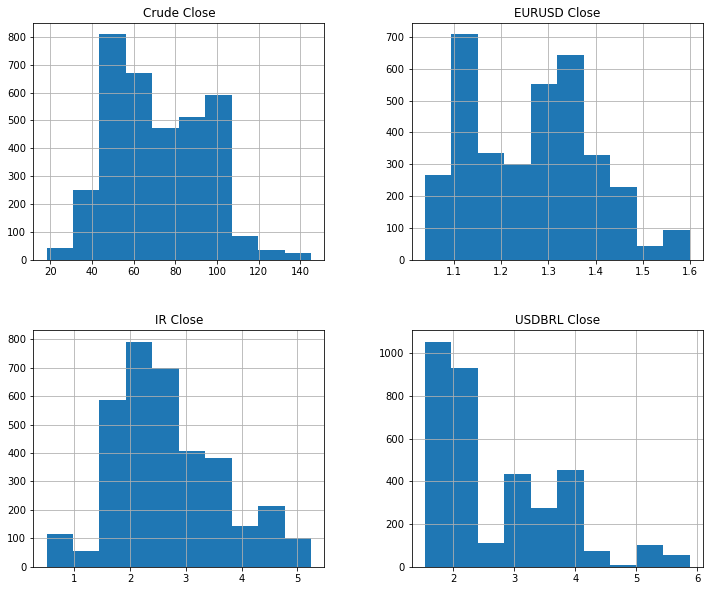

In [62]:
X.hist(figsize = (12,10))
plt.show()

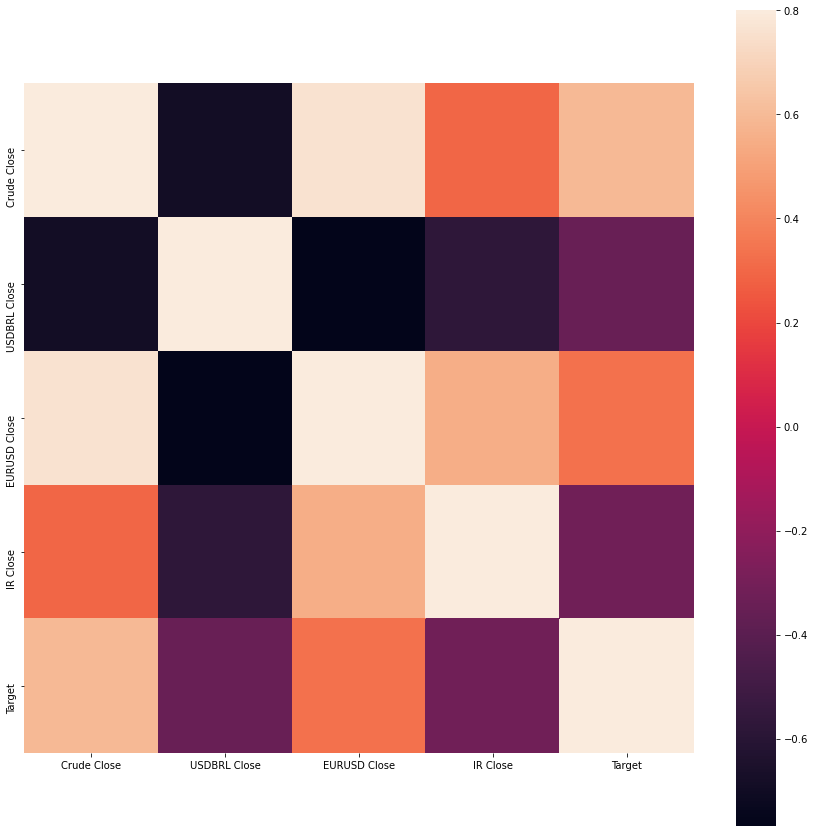

In [63]:
TrainData= X
TrainData["Target"]=s
C_mat = TrainData.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(C_mat, vmax=.8, square = True)
plt.show()